In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import qutip as qt
plt.style.use(['science', 'ieee'])
# plt.style.use('science')

# QPSK alphabet

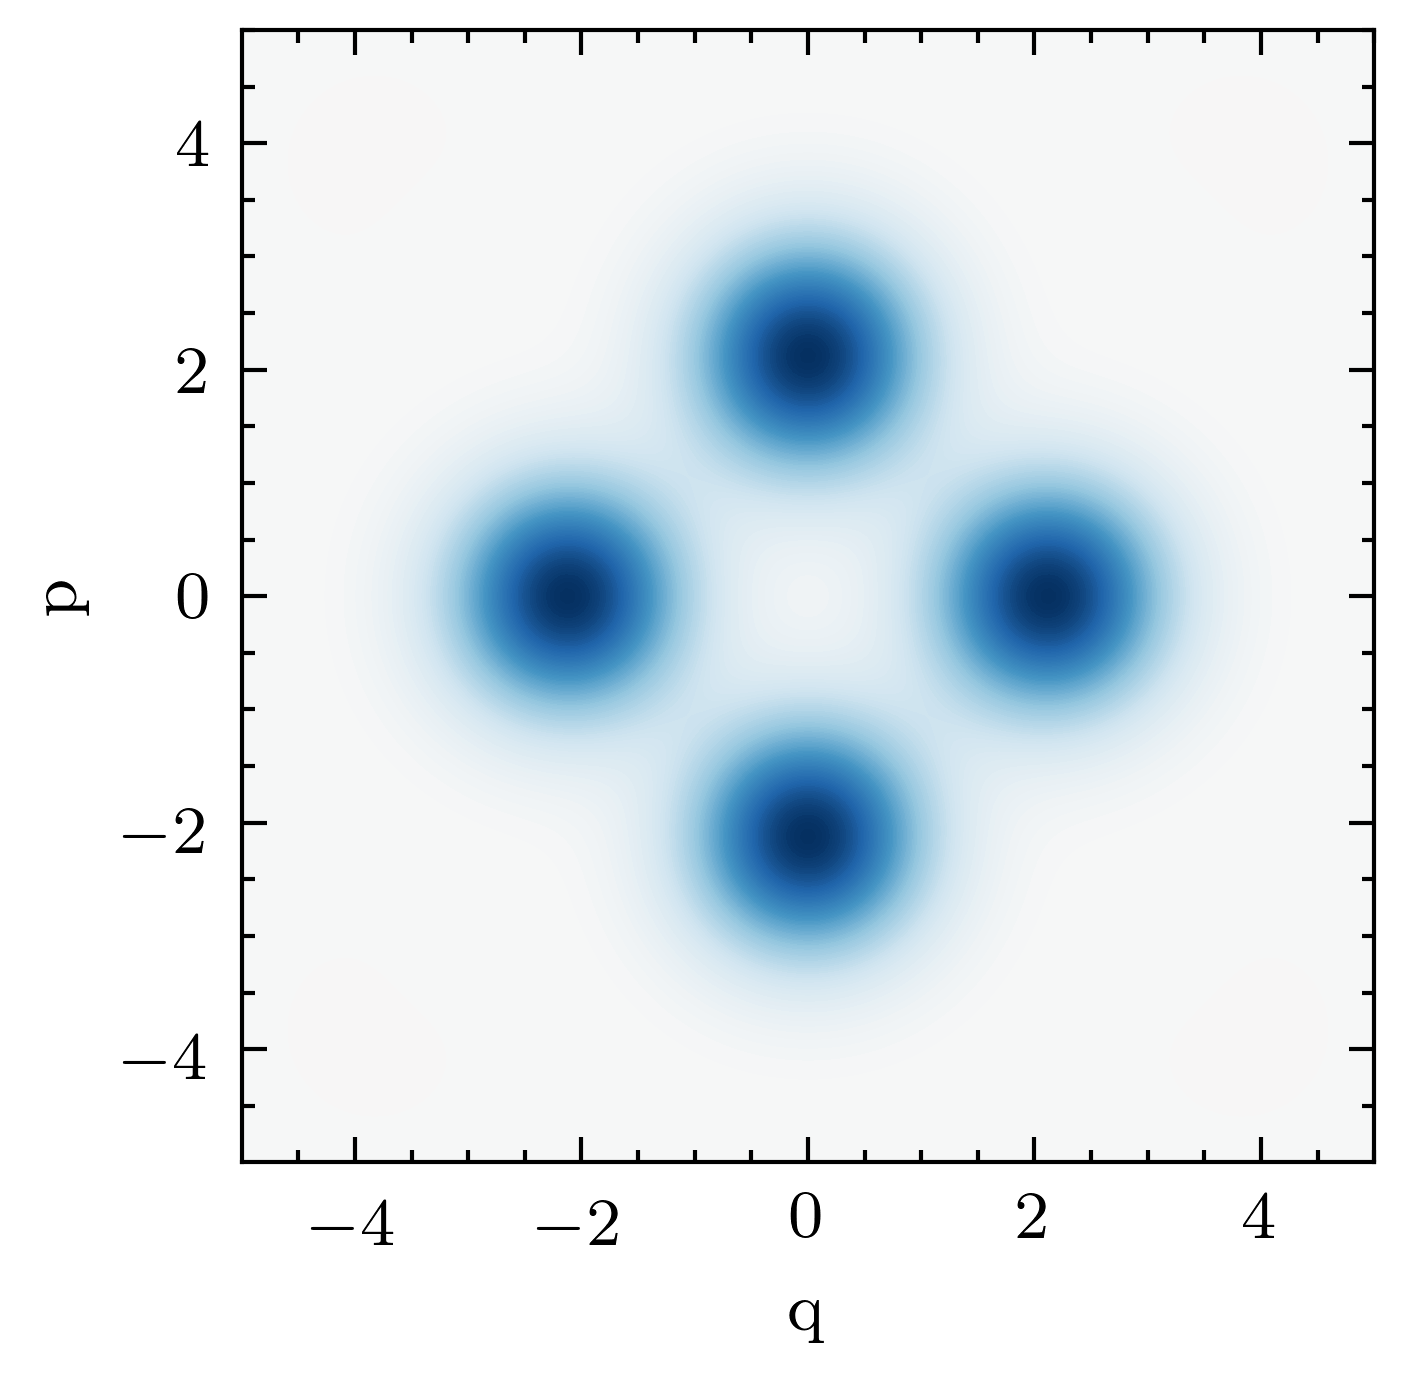

In [5]:
stateslist = np.full(4, 0, dtype="object")
dims=15
alpha=1.5
ampslist = [alpha, 1.0J * alpha, -alpha, -1.0J * alpha]
for idx, val in enumerate(ampslist):
    _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist = np.append(stateslist, _state)
    stateslist[idx]=_state

qpsk_alphabet = (1/4) * np.sum(stateslist, 0)
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(qpsk_alphabet, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)
# fig.savefig('qpsk_1.pdf')
fig.savefig('qpsk_1.png', dpi=300)

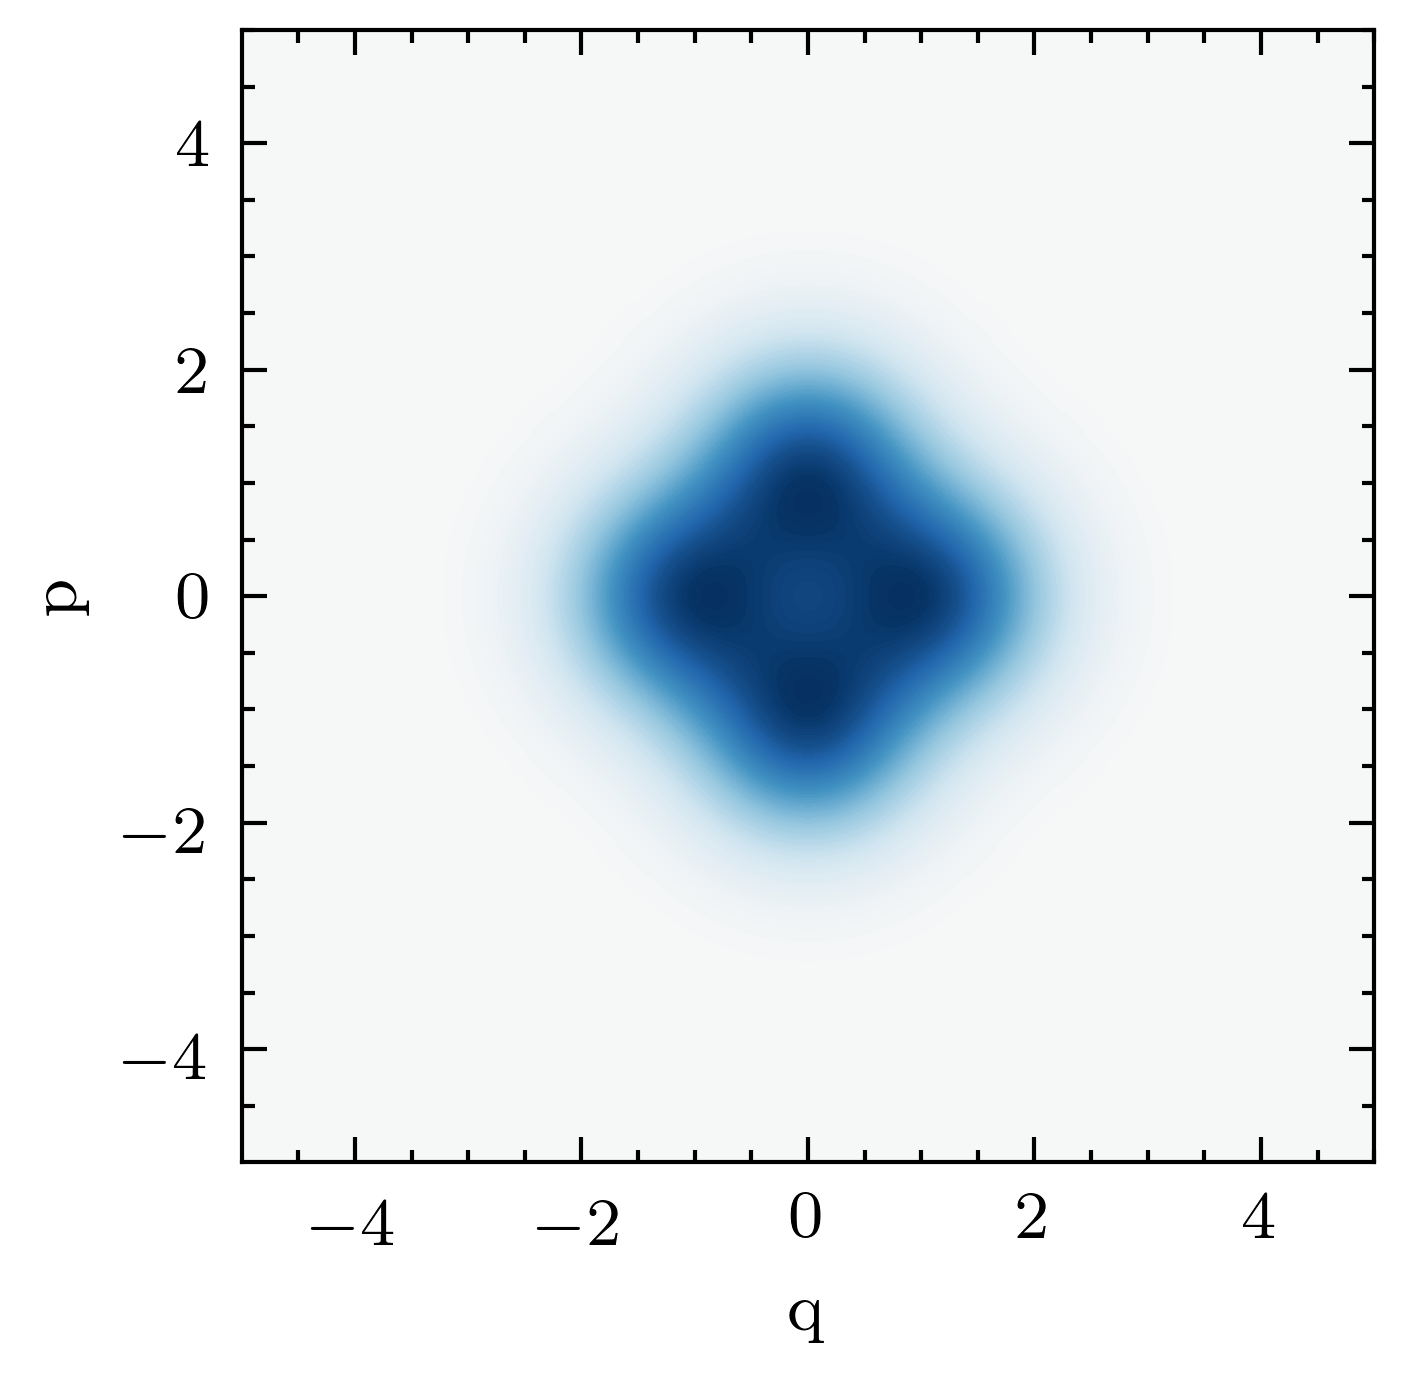

In [6]:
stateslist = np.full(4, 0, dtype="object")
dims=15
alpha=0.8
ampslist = [alpha, 1.0J * alpha, -alpha, -1.0J * alpha]
for idx, val in enumerate(ampslist):
    _state = qt.coherent_dm(dims, val, method="analytic")
#     stateslist = np.append(stateslist, _state)
    stateslist[idx]=_state

qpsk_alphabet = (1/4) * np.sum(stateslist, 0)
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W = qt.wigner(qpsk_alphabet, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)
# fig.savefig('qpsk_2.pdf')
fig.savefig('qpsk_2.png', dpi=300)

# Thermal state

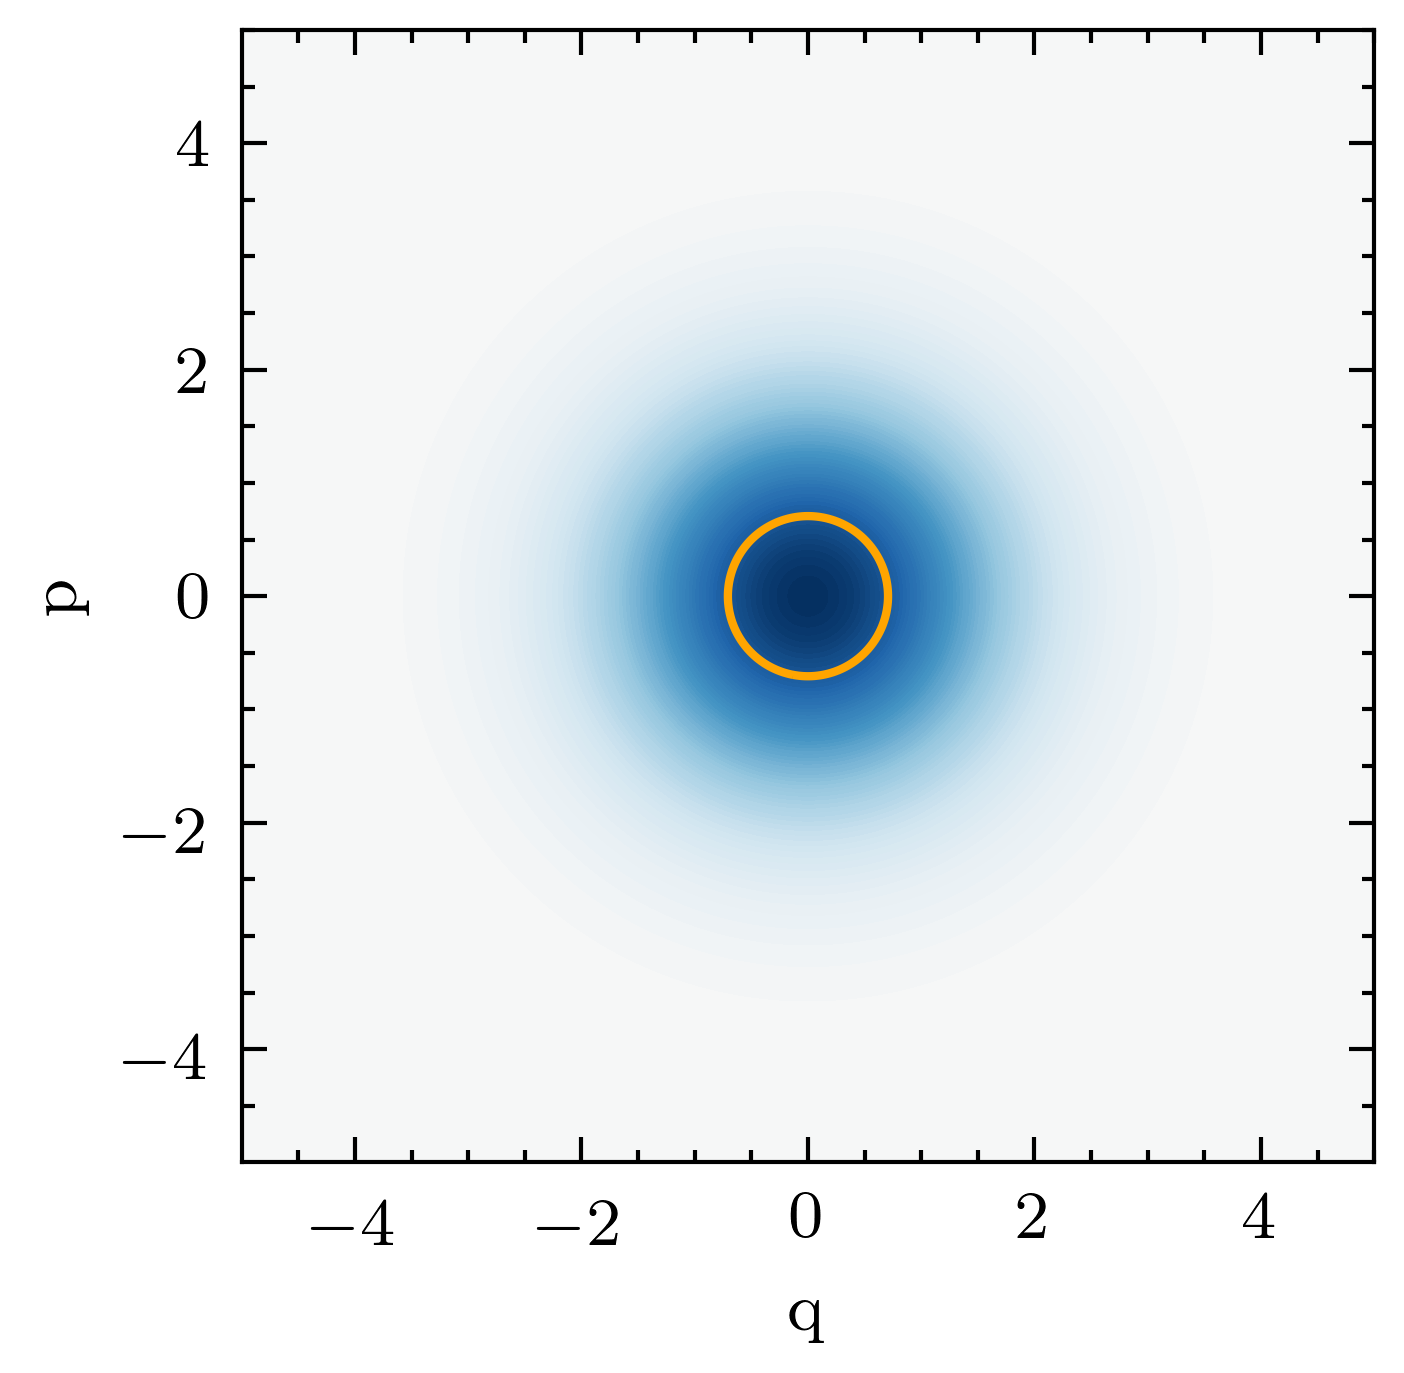

In [7]:
dims=25
barn=1.0
thermal_state = qt.thermal_dm(dims, barn, method="analytic")
xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 500)
W = qt.wigner(thermal_state, xvec, xvec)
nrm = mpl.colors.Normalize(-W.max(), W.max())


fig, ax = plt.subplots(1,1)
ax.contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
ax.set_xlabel("q")
ax.set_ylabel("p")
ax.autoscale(tight=True)
ax.set_aspect(1)

# x = np.linspace(-1.0, 1.0, 100)
# y = np.linspace(-1.0, 1.0, 100)
X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax.contour(X,Y,F,[0], colors=["orange"])

# fig.savefig('thermal_state.pdf')
fig.savefig('thermal_state.png', dpi=300)

# TMSV state

In [8]:
def barn2zeta(barn):
    """
    Converts average thermal photon number, barn,  in the thermal state (reduced state of tmsv) to the squeezing parameter \zeta required to give this level of barn.
    barn = np.sinh(zeta)**2
    therefore zeta = np.arcsinh(np.sqrt(barn))
    """
    return np.arcsinh(np.sqrt(barn))

def tmsv(barn, dims):
    _zeta = barn2zeta(barn)
    _prefactor = 1 / (np.cosh(_zeta)**2)
    _blankarray = np.zeros([dims, dims], dtype=object)
    
    for n in np.arange(0, dims-1):
        for m in np.arange(0, dims-1):
            _blankarray[n, m] = (np.tanh(_zeta)**(n + m)) * qt.tensor(qt.basis(dims, n), qt.basis(dims, n)) * qt.tensor(qt.basis(dims, m), qt.basis(dims, m)).trans()
    
    return np.sum(_prefactor * _blankarray)  

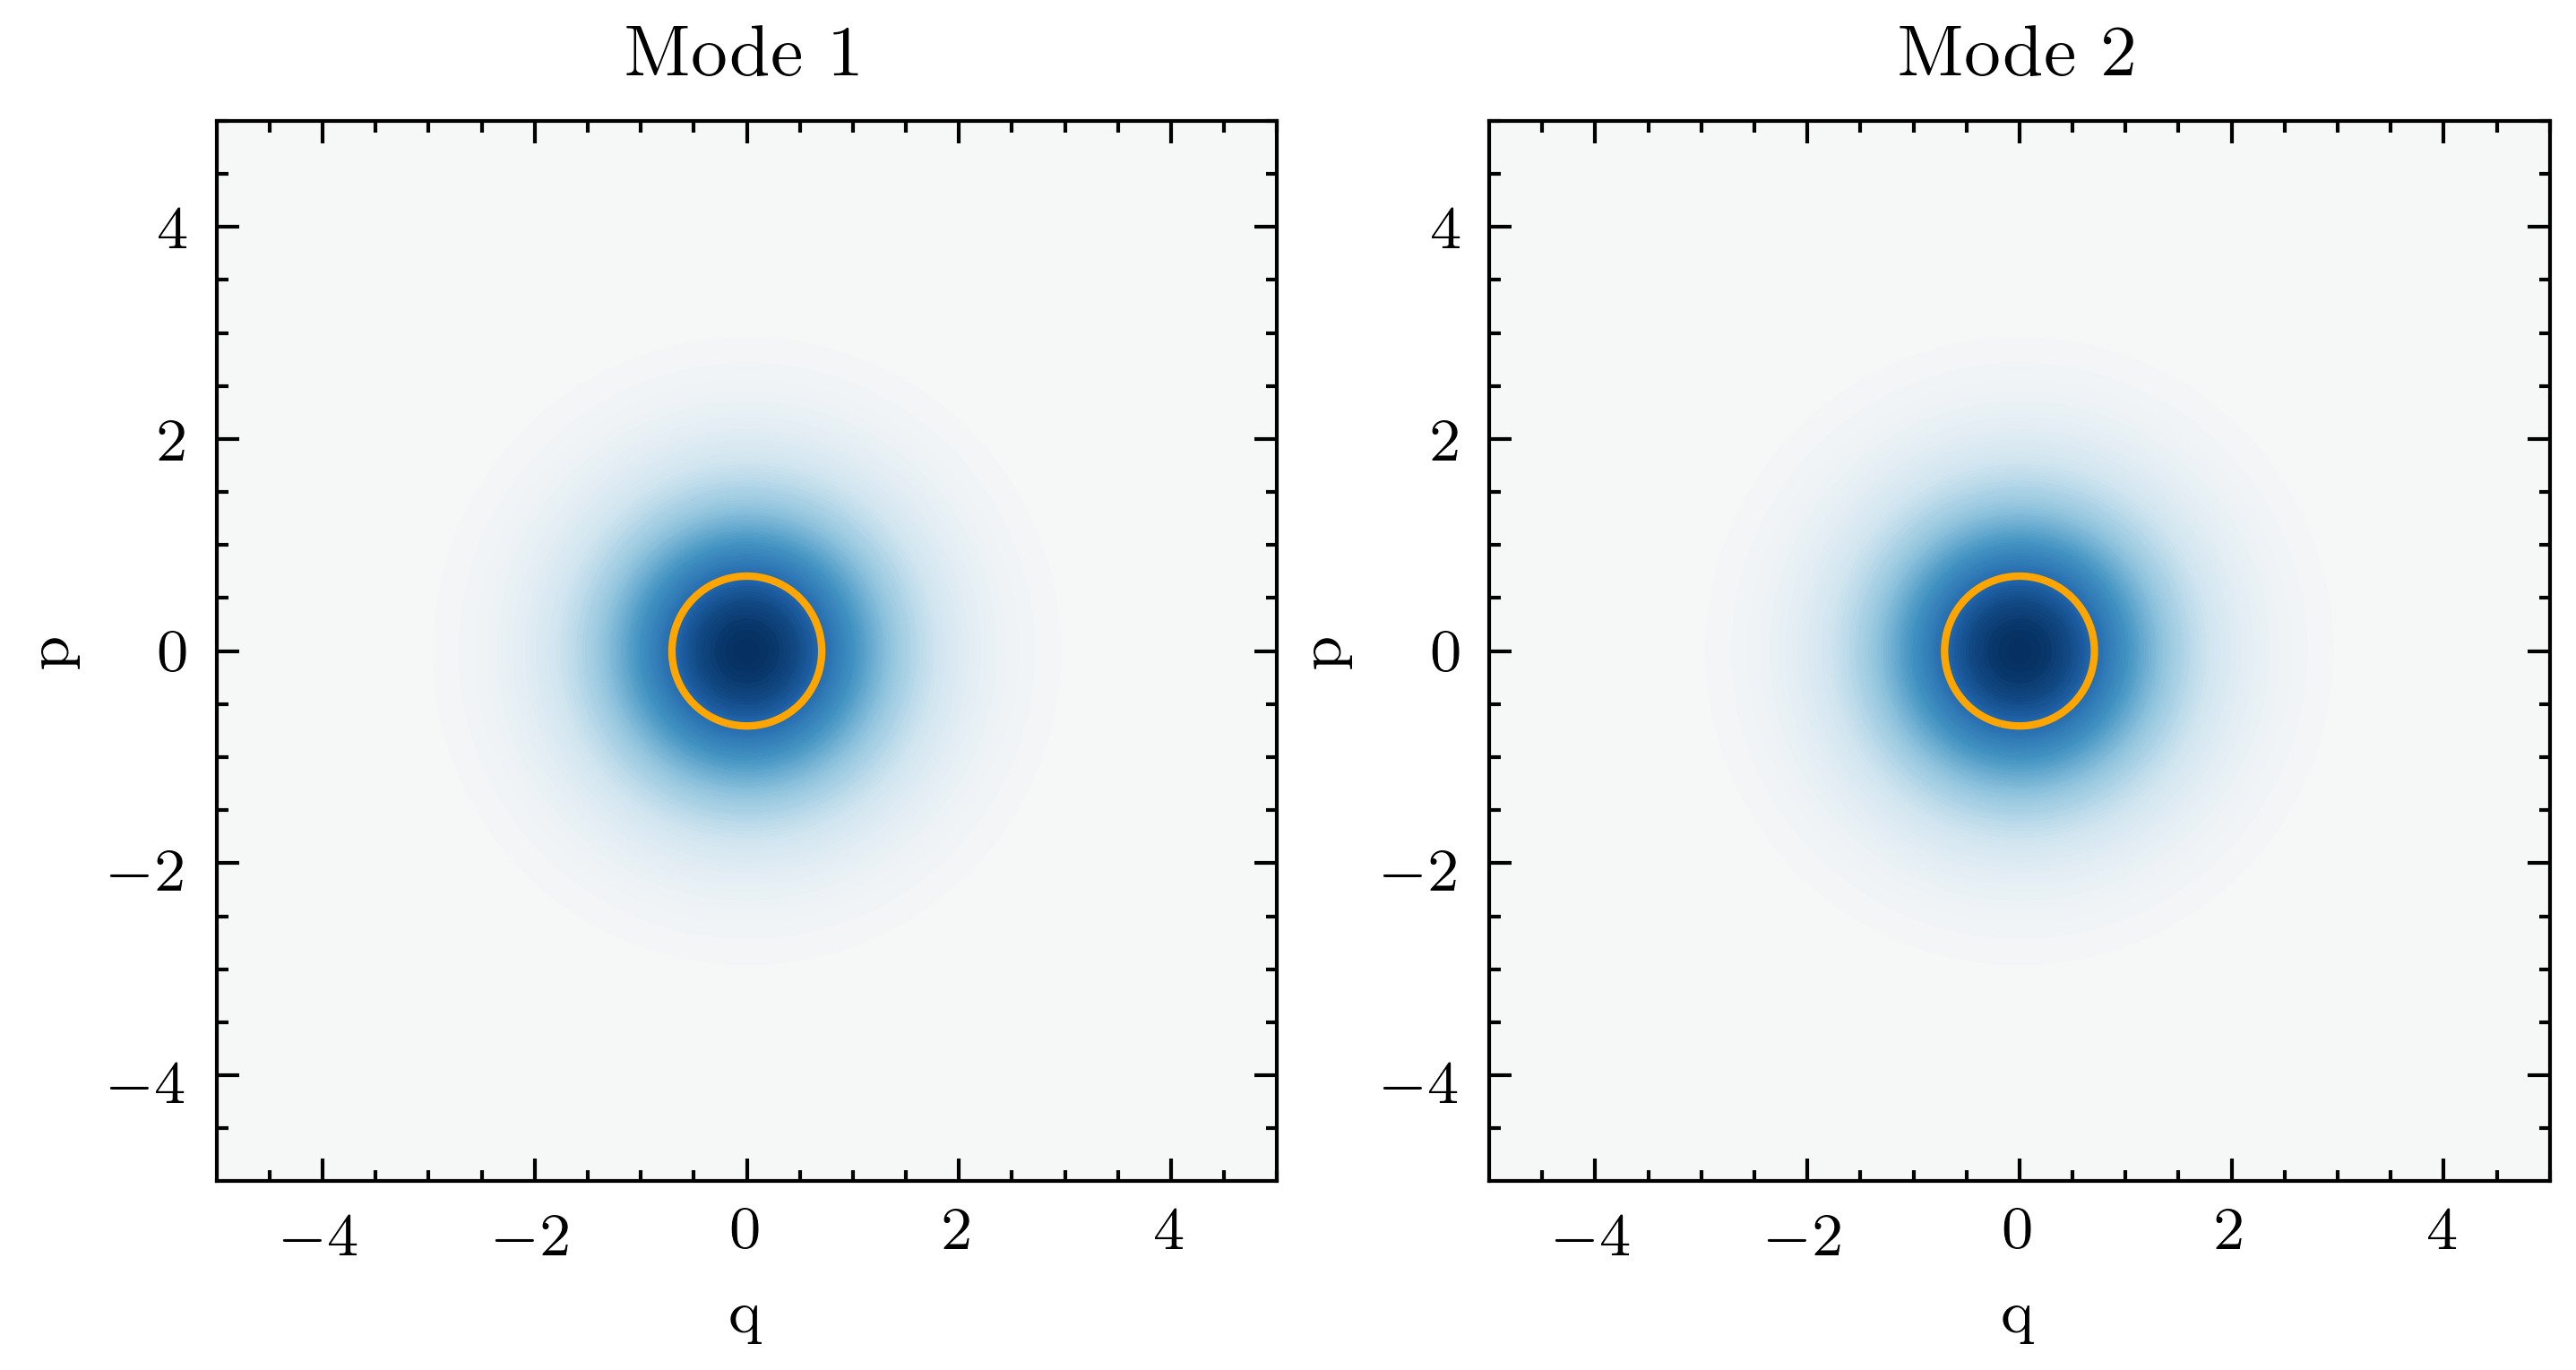

In [14]:
barn=0.5
dims=25
tmsv_state = tmsv(barn, dims)
x=2.8

xmin = -5
xmax = - xmin
xvec = np.linspace(xmin, xmax, 200)
W1 = qt.wigner(tmsv_state.ptrace(0), xvec, xvec)
W2 = qt.wigner(tmsv_state.ptrace(1), xvec, xvec)
nrm1 = mpl.colors.Normalize(-W1.max(), W1.max())
nrm2 = mpl.colors.Normalize(-W2.max(), W2.max())

fig, ax = plt.subplots(1, 2, figsize=(2*x, x))
ax[0].contourf(xvec, xvec, W1, 100, cmap=cm.RdBu, norm=nrm1)
ax[1].contourf(xvec, xvec, W2, 100, cmap=cm.RdBu, norm=nrm2)
ax[0].set_xlabel("q")
ax[0].set_ylabel("p")
ax[1].set_xlabel("q")
ax[1].set_ylabel("p")
ax[0].set_title("Mode 1")
ax[1].set_title("Mode 2")
ax[0].set_aspect(1)
ax[1].set_aspect(1)

ax[0].autoscale(tight=True)
ax[1].autoscale(tight=True)

X, Y = np.meshgrid(xvec, xvec)
F = X**2 + Y**2 - 0.5
ax[0].contour(X,Y,F,[0], colors=["orange"])
ax[1].contour(X,Y,F,[0], colors=["orange"])

# fig.savefig('tmsv_wigner.pdf')
fig.savefig('tmsv_wigner.png', dpi=300)

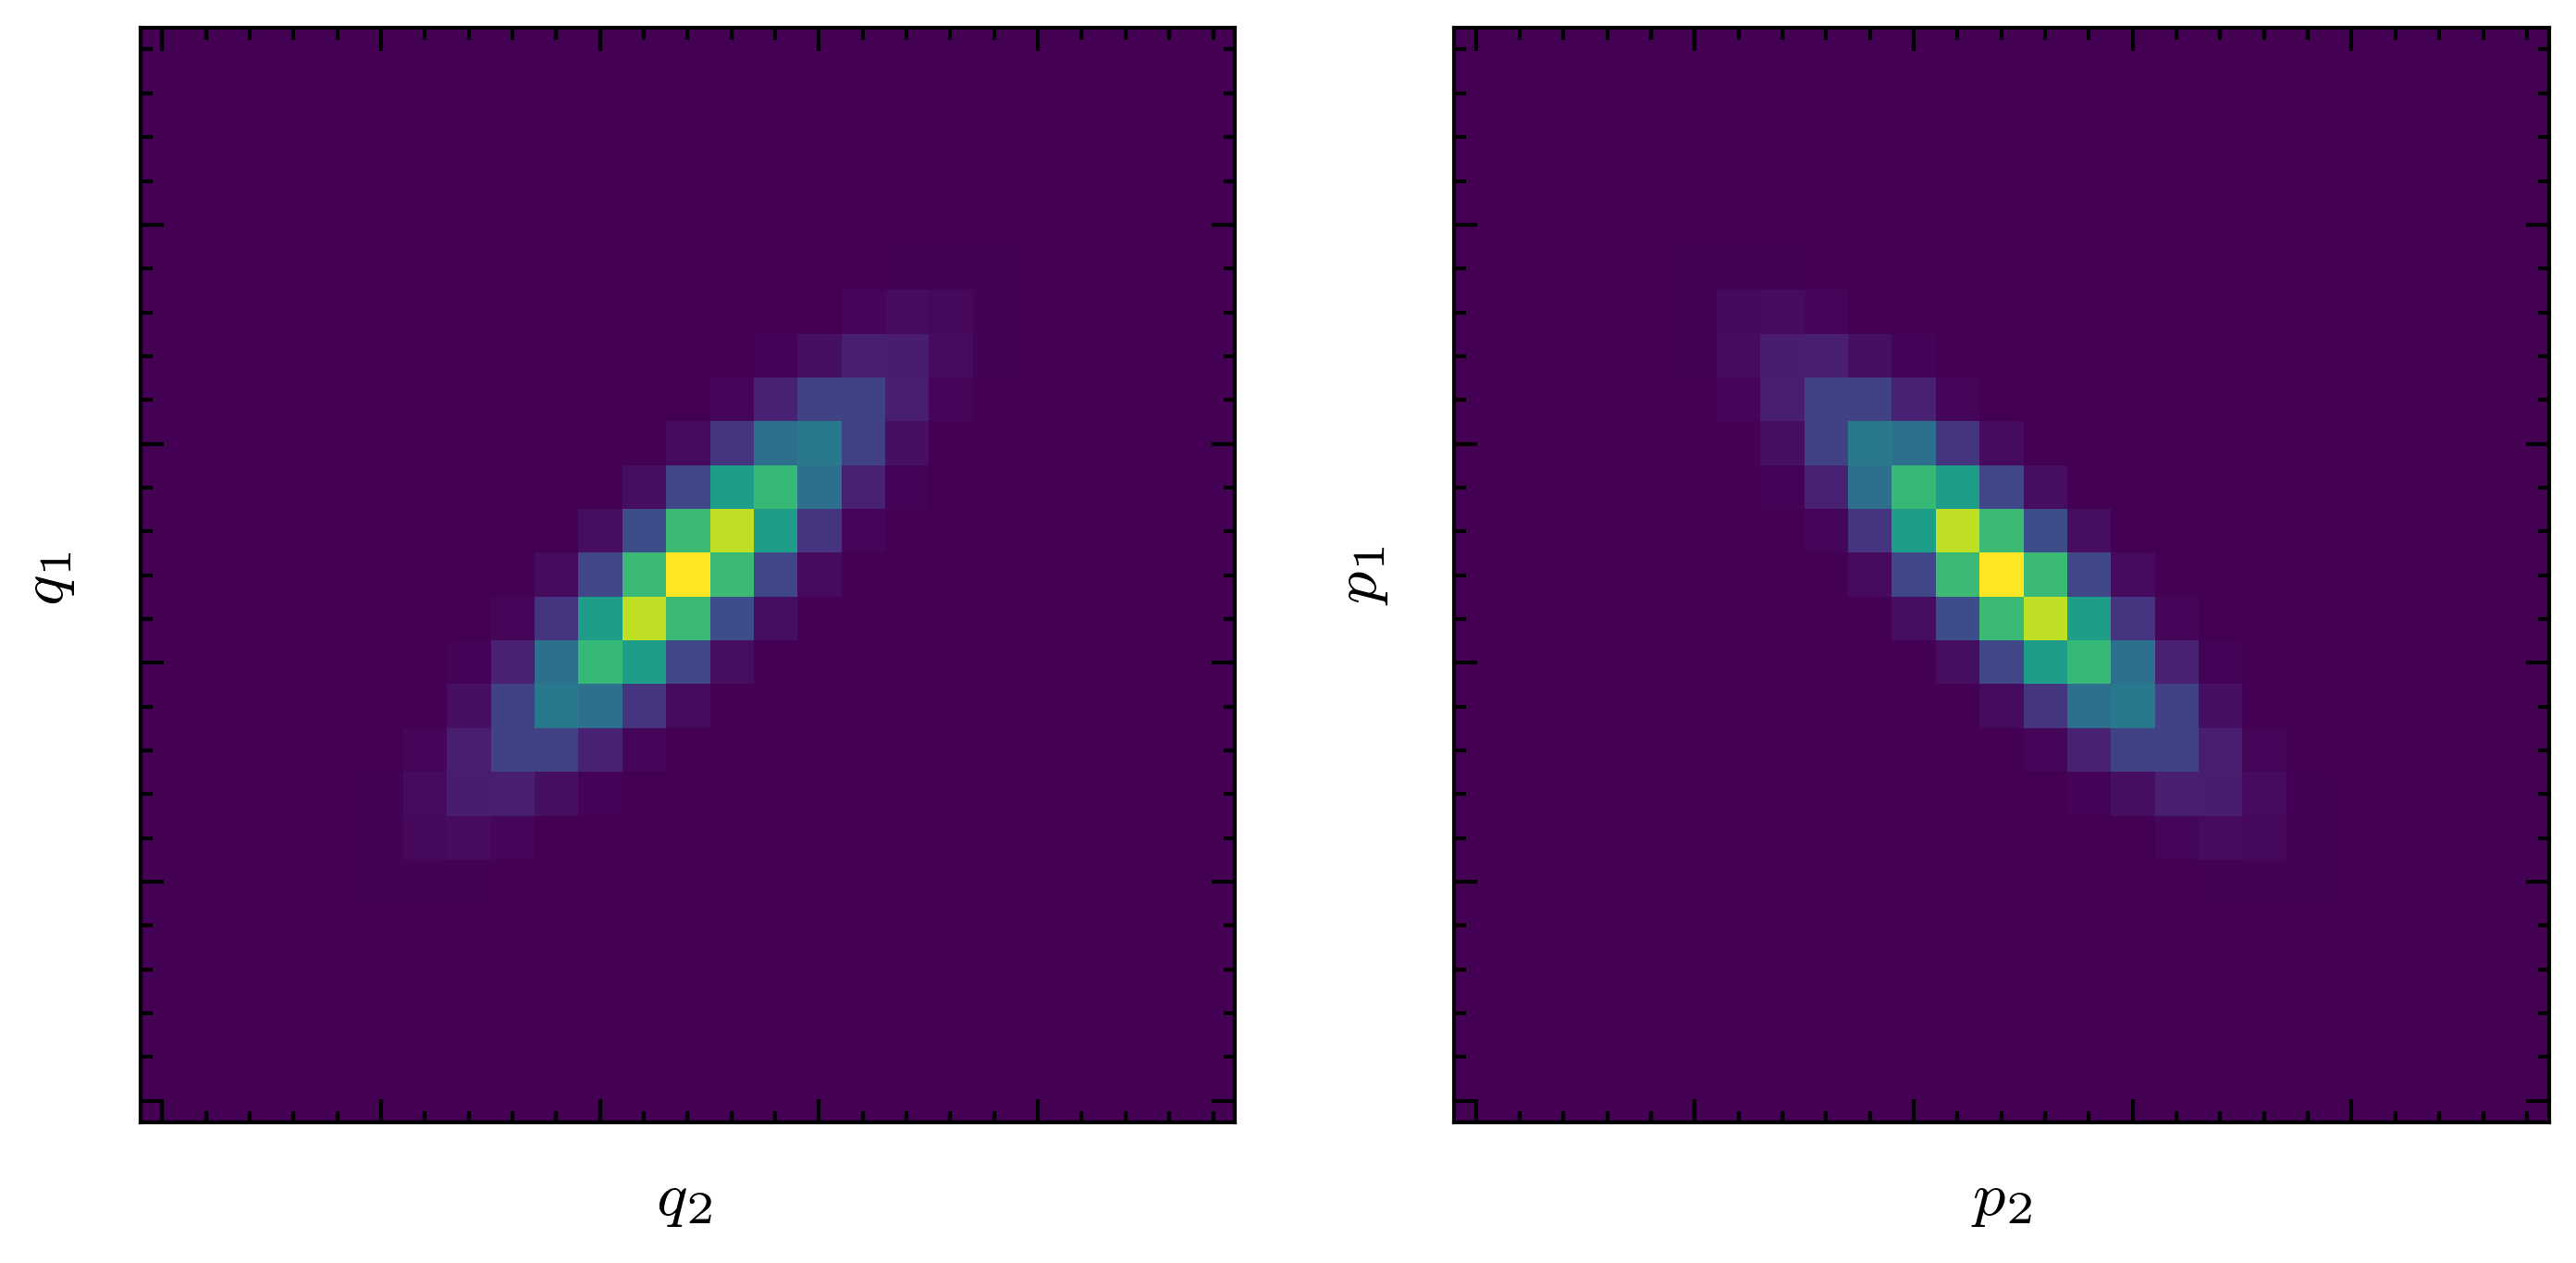

In [15]:
rho = tmsv_state
dims = rho.dims[0][0]
x=2.8

x_eigensystem = qt.position(dims).eigenstates()
x_eigenvalues = x_eigensystem[0]
x_eigenstates = x_eigensystem[1]

p_eigensystem = qt.momentum(dims).eigenstates()
p_eigenvalues = p_eigensystem[0]
p_eigenstates = p_eigensystem[1]


x_1_eigenstates = [qt.tensor(qt.ket2dm(x_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(x_eigenvalues))]
x_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(x_eigenstates[i])) for i in np.arange(len(x_eigenvalues))]

p_1_eigenstates = [qt.tensor(qt.ket2dm(p_eigenstates[i]), qt.qeye(dims)) for i in np.arange(len(p_eigenvalues))]
p_2_eigenstates = [qt.tensor(qt.qeye(dims), qt.ket2dm(p_eigenstates[i])) for i in np.arange(len(p_eigenvalues))]


mymatX = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatX[i][j] = np.real((x_1_eigenstates[i] * x_2_eigenstates[j] * rho).tr())


mymatP = [[0 for x in np.arange(dims)] for y in np.arange(dims)]
for i in np.arange(dims):
    for j in np.arange(dims):
        mymatP[i][j] = np.real((p_1_eigenstates[i] * p_2_eigenstates[j] * rho).tr())

fig, axes = plt.subplots(1, 2, figsize=(2*x, x))

xplot = axes[0].imshow(np.array(mymatX), origin=0)#extent=[x_2_min, x_2_max, x_1_min, x_1_max])
pplot = axes[1].imshow(np.array(mymatP), origin=0)# extent=[p_2_min, p_2_max, p_1_min, p_1_max])
axes[0].set_aspect(1)
axes[1].set_aspect(1)

axes[0].set_xlabel("$q_2$")
axes[0].set_ylabel("$q_1$")
axes[1].set_xlabel("$p_2$")
axes[1].set_ylabel("$p_1$")

axes[0].set_yticklabels([])
axes[0].set_xticklabels([])
axes[1].set_yticklabels([])
axes[1].set_xticklabels([])

# fig.savefig('tmsv_histogram.pdf')
fig.savefig('tmsv_histogram.png', dpi=300)